## Exploratory analysis of Tourism data

### Data Source

Website: https://www.opendata.go.ke/Tourism-Sector/Visitors-To-Museums-Snake-Park-And-Sites-1998-2013/wyay-7qis

### Description

Kenya National Bureau of Statistics Statistical Abstract 1998-2009, Numbers of Visitors To Museums,
Snake Park And Sites. 
For analysis purposes Null values in the attribute "No of visitors" were read as 0 .

In [1]:
import pandas as pd
df = pd.read_csv("Visitors_To_Museums_Snake_Park_And_Sites_1998-2013.csv")
df.head()

,Park,No of Vistors,Year of Visit
0,Lamu Museum,7316.0,01/01/2000 12:00:00 AM
1,Hyrax Hill,2059.0,01/01/2010 12:00:00 AM
2,Meru,21809.0,01/01/2011 12:00:00 AM
3,Others,35555.0,01/01/2007 12:00:00 AM
4,Kariandusi,5244.0,01/01/1999 12:00:00 AM


In [31]:
df.shape

(240, 3)

In [32]:
df["Year of Visit"].unique().shape

(16,)

In [33]:
df["Park"].unique().shape

(15,)

In [2]:
df["Year of Visit"] =pd.to_datetime(df["Year of Visit"])
df["year"] = df["Year of Visit"].dt.year
del df["Year of Visit"]
df_pivoted = df.pivot(index="year",columns="Park",values="No of Vistors")
df_pivoted.head()

Park,Fort Jesus,Gedi,Hyrax Hill,Jumba La Mtwana,Karen Blixen,Kariandusi,Kilifi Mwarani,Kisumu,Kitale,Lamu Museum,Meru,National Museum,Orlogesaile,Others,Snake Park
year,,,,,,,,,,,,,,,
1998,88887.0,14841.0,2751.0,3982.0,41069.0,4515.0,2850.0,34704.0,27258.0,6242.0,15787.0,173444.0,1924.0,5800.0,75976.0
1999,107845.0,27304.0,2450.0,5505.0,50019.0,5244.0,3390.0,45878.0,22489.0,6674.0,16603.0,196384.0,2195.0,6700.0,81145.0
2000,96480.0,21755.0,3298.0,5102.0,52618.0,4951.0,894.0,48095.0,28111.0,7316.0,18123.0,210907.0,2406.0,8000.0,85013.0
2001,140258.0,18137.0,3387.0,4615.0,51349.0,4634.0,1147.0,62251.0,29596.0,4261.0,19151.0,251572.0,1801.0,8000.0,83622.0
2002,140700.0,23300.0,6100.0,3100.0,46400.0,5700.0,1800.0,45100.0,21500.0,800.0,14900.0,202700.0,7300.0,7470.0,76200.0


In [37]:
df_pivoted.columns


Index(['Fort Jesus', 'Gedi', 'Hyrax Hill', 'Jumba La Mtwana', 'Karen Blixen',
       'Kariandusi', 'Kilifi Mwarani', 'Kisumu', 'Kitale', 'Lamu Museum',
       'Meru', 'National Museum', 'Orlogesaile', 'Others', 'Snake Park',
       'Total'],
      dtype='object', name='Park')

In [3]:
df_pivoted['Total'] = df_pivoted.sum(axis=1)
df_pivoted.head()

Park,Fort Jesus,Gedi,Hyrax Hill,Jumba La Mtwana,Karen Blixen,Kariandusi,Kilifi Mwarani,Kisumu,Kitale,Lamu Museum,Meru,National Museum,Orlogesaile,Others,Snake Park,Total
year,,,,,,,,,,,,,,,,
1998,88887.0,14841.0,2751.0,3982.0,41069.0,4515.0,2850.0,34704.0,27258.0,6242.0,15787.0,173444.0,1924.0,5800.0,75976.0,500030.0
1999,107845.0,27304.0,2450.0,5505.0,50019.0,5244.0,3390.0,45878.0,22489.0,6674.0,16603.0,196384.0,2195.0,6700.0,81145.0,579825.0
2000,96480.0,21755.0,3298.0,5102.0,52618.0,4951.0,894.0,48095.0,28111.0,7316.0,18123.0,210907.0,2406.0,8000.0,85013.0,593069.0
2001,140258.0,18137.0,3387.0,4615.0,51349.0,4634.0,1147.0,62251.0,29596.0,4261.0,19151.0,251572.0,1801.0,8000.0,83622.0,683781.0
2002,140700.0,23300.0,6100.0,3100.0,46400.0,5700.0,1800.0,45100.0,21500.0,800.0,14900.0,202700.0,7300.0,7470.0,76200.0,603070.0


In [4]:
df_pivoted_new = df_pivoted.loc[:,'Fort Jesus':'Snake Park'].div(df_pivoted["Total"], axis=0)
df_pivoted_new = df_pivoted_new.loc[:,'Fort Jesus':'Snake Park']*100

In [5]:
df_pivoted_new.sum(axis=1)

year
1998    100.0
1999    100.0
2000    100.0
2001    100.0
2002    100.0
2003    100.0
2004    100.0
2005    100.0
2006    100.0
2007    100.0
2008    100.0
2009    100.0
2010    100.0
2011    100.0
2012    100.0
2013    100.0
dtype: float64

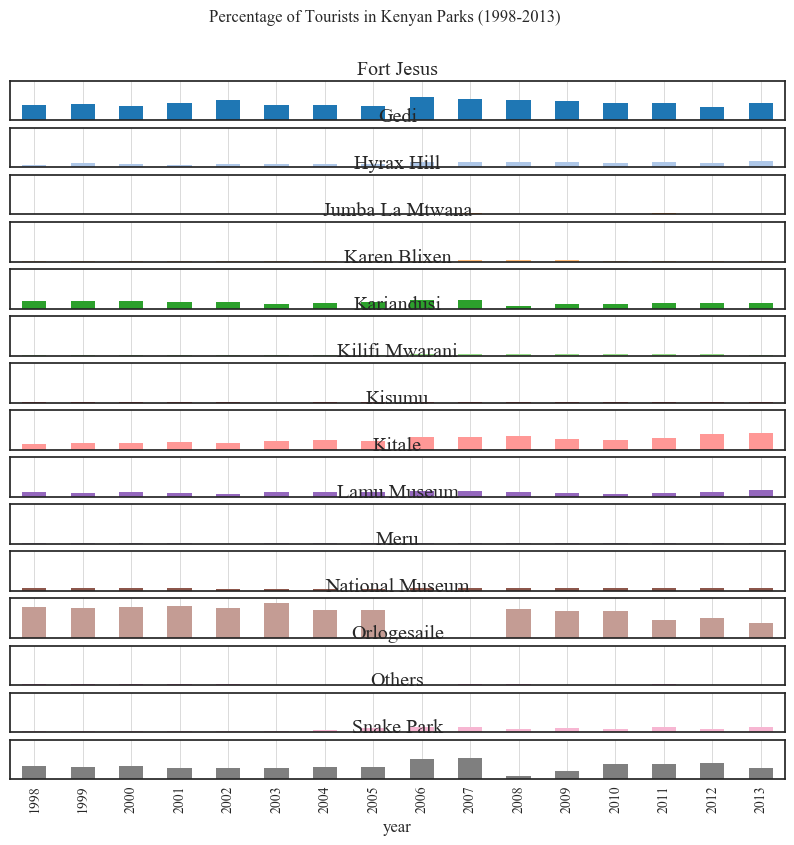

In [7]:
import matplotlib
from matplotlib import interactive
interactive(True)
import matplotlib.pyplot as plt
matplotlib.style.use("seaborn-white")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

axs = df_pivoted_new.plot(kind='bar', subplots=True, sharey=True, legend=False, yticks=[],
                          edgecolor='none', grid = True, color=tableau20, figsize=(10,9), 
                          title="Percentage of Tourists in Kenyan Parks (1998-2013)"
                         )

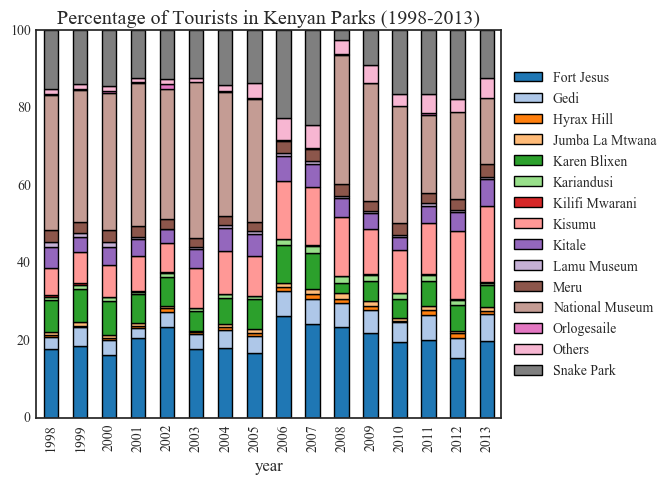

In [30]:
df_pivoted_new.plot.bar(stacked=True, color= tableau20, figsize=(6,5),ylim=[0,100],
                         title=("Percentage of Tourists in Kenyan Parks (1998-2013)")).legend(loc='center left', bbox_to_anchor=(1, 0.5))


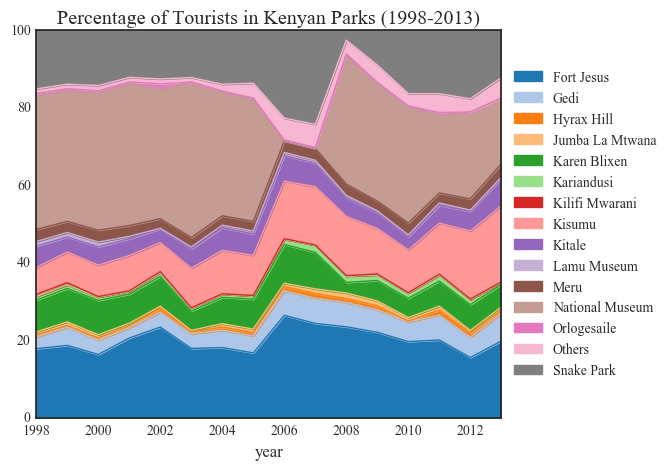

In [28]:
df_pivoted_new.plot.area(stacked=True, color= tableau20, figsize=(6,5), ylim=[0,100],
                         title=("Percentage of Tourists in Kenyan Parks (1998-2013)")).legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Conclusion

From the panel bar charts and area plot above, we observe that:
1. Snake Park, National Museum, Kisumu, Karen Blixen and Fort Jesus Parks have good numbers of visitors throughout the year. 
2. National Museum indicated Nil visitors in the years 2006 and 2007
3. The number of visitors in "Others" Parks increased significantly from the year 2005
